## Need to make 3 observations
    
    One trend that we can see is that the closer you are to the equator the hotter a city's max temperature usually is in proximity to being closer to the equator. So we can see that typically there are hotter cities the closer a city is to the equator.
    
    Another trend that we can see is that humidity isn't affected too much by proximity to the equator but we can also see that there is more cities that have less humidity the farther north of the equator than south of the equator so there is more likely less humidity north of the equator in some cities.
    
    And the final trends that we can see from our data is that cloudiness and wind speed have no relation to latitude. From the data cloudiness was all over the place so proximity to equator had no affect on a city's cloudiness. Also from the data we can see that wind speed is generally the same no matter where you are in relation to the equator meaning that wind speed will be generally the same wherever you are.
    

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Code given at the start of the hw assignment

#I added pprint so I could use pretty print, shout out to Kaylie best idea from her

#Also put the api_key into a variable since I didn't put it into the outside api_keys.py file

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
# Import API key
from api_keys import api_key
api_key = 'e765787c1ef8c9168523bb6d424f0219'
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#need to install this citipy for the import above to work
#!pip install citipy

## Generate Cities List

In [3]:
#Code given at the start of the hw assignment

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [4]:
#Made a test base_url to see the json
base_url = 'http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid='+ api_key + "&q=" + 'avarua'

In [5]:
#Pretty printed the test base_url to see the json and now see how it is structured
pprint(requests.get(base_url).json())

{'base': 'stations',
 'clouds': {'all': 4},
 'cod': 200,
 'coord': {'lat': -21.21, 'lon': -159.78},
 'dt': 1562630770,
 'id': 4035715,
 'main': {'humidity': 74,
          'pressure': 1014,
          'temp': 78.8,
          'temp_max': 78.8,
          'temp_min': 78.8},
 'name': 'Avarua',
 'sys': {'country': 'CK',
         'id': 7271,
         'message': 0.0071,
         'sunrise': 1562606221,
         'sunset': 1562645458,
         'type': 1},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 60, 'speed': 6.93}}


In [6]:
#Made the base_url to be used for the loop
base_url = 'http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid='+ api_key

In [7]:
#First created a bunch of empty lists to hold all the information that we want to keep record of
City_name = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

#Counter created like the example showed to keep track of how many cities generated
counter = 1

#Created a beginning and end of the data retrieval to show start and finish like the example

#Made a loop to creat a json for every city

#Also in the loop we put all the information we were looking for in each city's json into 
#their respective empty lists we created to hold said data

#Needed to create an exception because the loop will fail when trying to append in when some cities are not found
print('Beginning Data Retrieval')
print('-----------------------------')
for city in cities:
    try:
        response = requests.get(f'{base_url}&q={city}').json()
        City_name.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f'Processing Record {counter} of Set 1 | {city}')
        counter = counter +1
    except KeyError:
        print('City not found. Skipping...')
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | norman wells
City not found. Skipping...
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 5 of Set 1 | macheng
Processing Record 6 of Set 1 | lenger
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | chifeng
Processing Record 11 of Set 1 | wiang sa
City not found. Skipping...
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | san andres
Processing Record 15 of Set 1 | archena
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | lensk
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | polunochnoye
Processing Record 20 of Set 1 | adwa
Processing Record 21 of Set 1 | khatanga
P

Processing Record 182 of Set 1 | ahar
Processing Record 183 of Set 1 | high prairie
Processing Record 184 of Set 1 | bereda
Processing Record 185 of Set 1 | imbituba
Processing Record 186 of Set 1 | paso de carrasco
Processing Record 187 of Set 1 | thinadhoo
Processing Record 188 of Set 1 | victoria
City not found. Skipping...
Processing Record 189 of Set 1 | fort smith
Processing Record 190 of Set 1 | cockburn town
Processing Record 191 of Set 1 | ugoofaaru
Processing Record 192 of Set 1 | san cristobal
City not found. Skipping...
Processing Record 193 of Set 1 | cabanglasan
Processing Record 194 of Set 1 | rawson
Processing Record 195 of Set 1 | ahipara
Processing Record 196 of Set 1 | kirakira
Processing Record 197 of Set 1 | tabuk
Processing Record 198 of Set 1 | dunedin
Processing Record 199 of Set 1 | peniche
City not found. Skipping...
Processing Record 200 of Set 1 | maragheh
Processing Record 201 of Set 1 | smoky lake
City not found. Skipping...
Processing Record 202 of Set 1 

Processing Record 354 of Set 1 | quatre cocos
Processing Record 355 of Set 1 | camopi
Processing Record 356 of Set 1 | shimoda
Processing Record 357 of Set 1 | ramshir
Processing Record 358 of Set 1 | te anau
Processing Record 359 of Set 1 | bunde
Processing Record 360 of Set 1 | deputatskiy
Processing Record 361 of Set 1 | santa maria
Processing Record 362 of Set 1 | lavrentiya
Processing Record 363 of Set 1 | kangaatsiaq
Processing Record 364 of Set 1 | passagem franca
Processing Record 365 of Set 1 | saint anthony
Processing Record 366 of Set 1 | tiksi
Processing Record 367 of Set 1 | vysokogornyy
Processing Record 368 of Set 1 | kavieng
Processing Record 369 of Set 1 | pangnirtung
Processing Record 370 of Set 1 | souillac
Processing Record 371 of Set 1 | amapa
Processing Record 372 of Set 1 | medicine hat
Processing Record 373 of Set 1 | tomakomai
Processing Record 374 of Set 1 | ternate
Processing Record 375 of Set 1 | mount gambier
Processing Record 376 of Set 1 | haimen
Processi

In [8]:
#A dictionary was made to hold all the lists we have now with the stored data
Weather_dict = {
    'City':City_name,
    'Cloudiness':Cloudiness,
    'Country':Country,
    'Date':Date,
    'Humidity':Humidity,
    'Lat':Lat,
    'Lng':Lng,
    'Max_Temp':Max_Temp,
    'Wind_Speed':Wind_Speed,
}

#Next we create a data frame from the dictionary we made
Weather_data = pd.DataFrame(Weather_dict)

In [9]:
#Get a count of how many cities we generated from our loop
Weather_data.count()

City          528
Cloudiness    528
Country       528
Date          528
Humidity      528
Lat           528
Lng           528
Max_Temp      528
Wind_Speed    528
dtype: int64

In [10]:
#Show a preview of the data frame we created
Weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Georgetown,40,GY,1562630195,78,6.80,-58.16,82.40,4.70
1,Norman Wells,40,CA,1562630468,37,65.28,-126.83,66.20,9.17
2,Mataura,100,NZ,1562630892,75,-46.19,168.86,50.00,17.00
3,Ushuaia,0,AR,1562630381,80,-54.81,-68.31,41.00,4.70
4,Macheng,99,CN,1562630893,93,31.18,115.03,69.37,8.43


In [11]:
#Create a CSV of our data frame
Weather_data.to_csv('../Homework_CSV_and_images/Weather_data.csv')

In [12]:
#Decided to put each column of the data we will compare in each scatter into variables 
#to make it easier to when creating the plot
lat_x = Weather_data['Lat']
Temp_y = Weather_data['Max_Temp']
Humid_y = Weather_data['Humidity']
Cloud_y = Weather_data['Cloudiness']
Wind_y = Weather_data['Wind_Speed']

In [13]:
#Showing a preview of the variables to see the they hold the right data we want
lat_x.head()

0     6.80
1    65.28
2   -46.19
3   -54.81
4    31.18
Name: Lat, dtype: float64

In [14]:
#Preview of the data we want to compare
Temp_y.head()

0    82.40
1    66.20
2    50.00
3    41.00
4    69.37
Name: Max_Temp, dtype: float64

In [15]:
#Preview of the data we want to compare
Humid_y.head()

0    78
1    37
2    75
3    80
4    93
Name: Humidity, dtype: int64

In [16]:
#Preview of the data we want to compare
Cloud_y.head()

0     40
1     40
2    100
3      0
4     99
Name: Cloudiness, dtype: int64

In [17]:
#Preview of the data we want to compare
Wind_y.head()

0     4.70
1     9.17
2    17.00
3     4.70
4     8.43
Name: Wind_Speed, dtype: float64

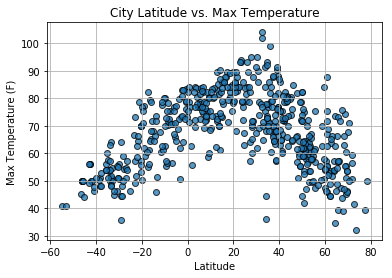

In [18]:
#A scatter plot is created to compare Latitude and Max temperature

#Then added all the details needed for the scatter

plt.scatter(lat_x, Temp_y, marker = 'o', edgecolors = 'black', alpha = .75)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('../Homework_CSV_and_images/Latitude_vs_Max_Temp.png')
plt.show()

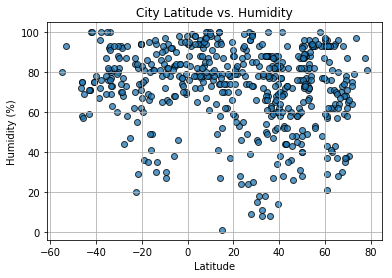

In [19]:
#A scatter plot is created to compare Latitude and Humidity

#Then added all the details needed for the scatter

plt.scatter(lat_x, Humid_y, marker = 'o', edgecolors = 'black', alpha = .75)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('../Homework_CSV_and_images/Latitude_vs_Humidity.png')
plt.show()

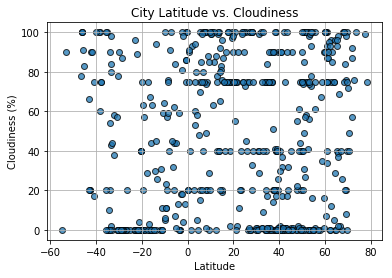

In [23]:
#A scatter plot is created to compare Latitude and Cloudiness

#Then added all the details needed for the scatter

plt.scatter(lat_x, Cloud_y, marker = 'o', edgecolors = 'black', alpha = .75)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('../Homework_CSV_and_images/Latitude_vs_Cloudiness.png')
plt.show()

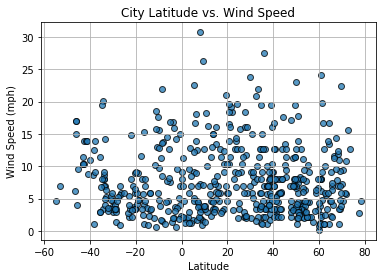

In [21]:
#A scatter plot is created to compare Latitude and Wind Speed

#Then added all the details needed for the scatter

plt.scatter(lat_x, Wind_y, marker = 'o', edgecolors = 'black', alpha = .75)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('../Homework_CSV_and_images/Latitude_vs_Wind_Speed.png')
plt.show()

In [22]:
Weather_data.corr()

,Cloudiness,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
Cloudiness,1.000000,-0.011190,0.261799,0.084166,0.165175,0.003319,0.057958
Date,-0.011190,1.000000,0.065165,0.011967,0.148785,0.057842,-0.100378
Humidity,0.261799,0.065165,1.000000,-0.165158,0.218194,-0.290168,-0.114087
Lat,0.084166,0.011967,-0.165158,1.000000,-0.035250,0.061320,-0.014065
Lng,0.165175,0.148785,0.218194,-0.035250,1.000000,-0.149178,-0.054512
Max_Temp,0.003319,0.057842,-0.290168,0.061320,-0.149178,1.000000,0.194327
Wind_Speed,0.057958,-0.100378,-0.114087,-0.014065,-0.054512,0.194327,1.000000


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

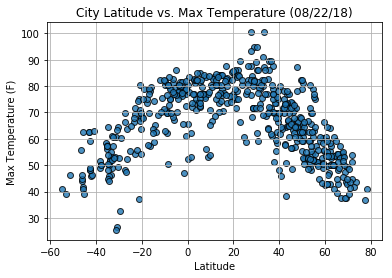

#### Latitude vs. Humidity Plot

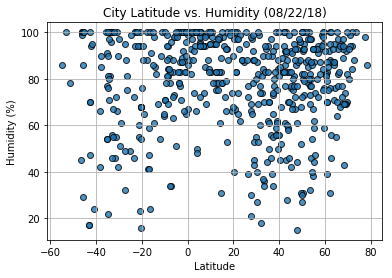

#### Latitude vs. Cloudiness Plot

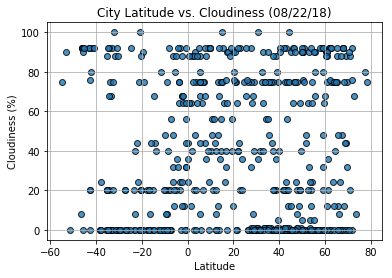

#### Latitude vs. Wind Speed Plot

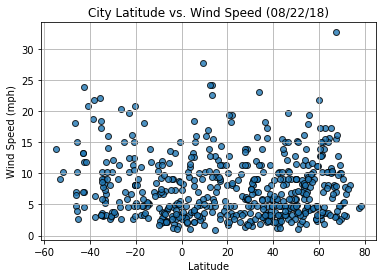